In [11]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from datetime import datetime, timedelta
# from sklearn.neighbors import KernelDensity
from IPython.display import set_matplotlib_formats
import numpy as np
import math


set_matplotlib_formats('retina')

/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_3375/2020654370.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
df_lockdown1 = pd.read_csv("./data/lockdown1.csv")
df_lockdown2 = pd.read_csv("./data/lockdown2.csv")
df_normal = pd.read_csv("./data/normal07_10.csv")

/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_3375/1299928494.py:2: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lockdown2 = pd.read_csv("./data/lockdown2.csv")
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_3375/1299928494.py:3: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_normal = pd.read_csv("./data/normal07_10.csv")


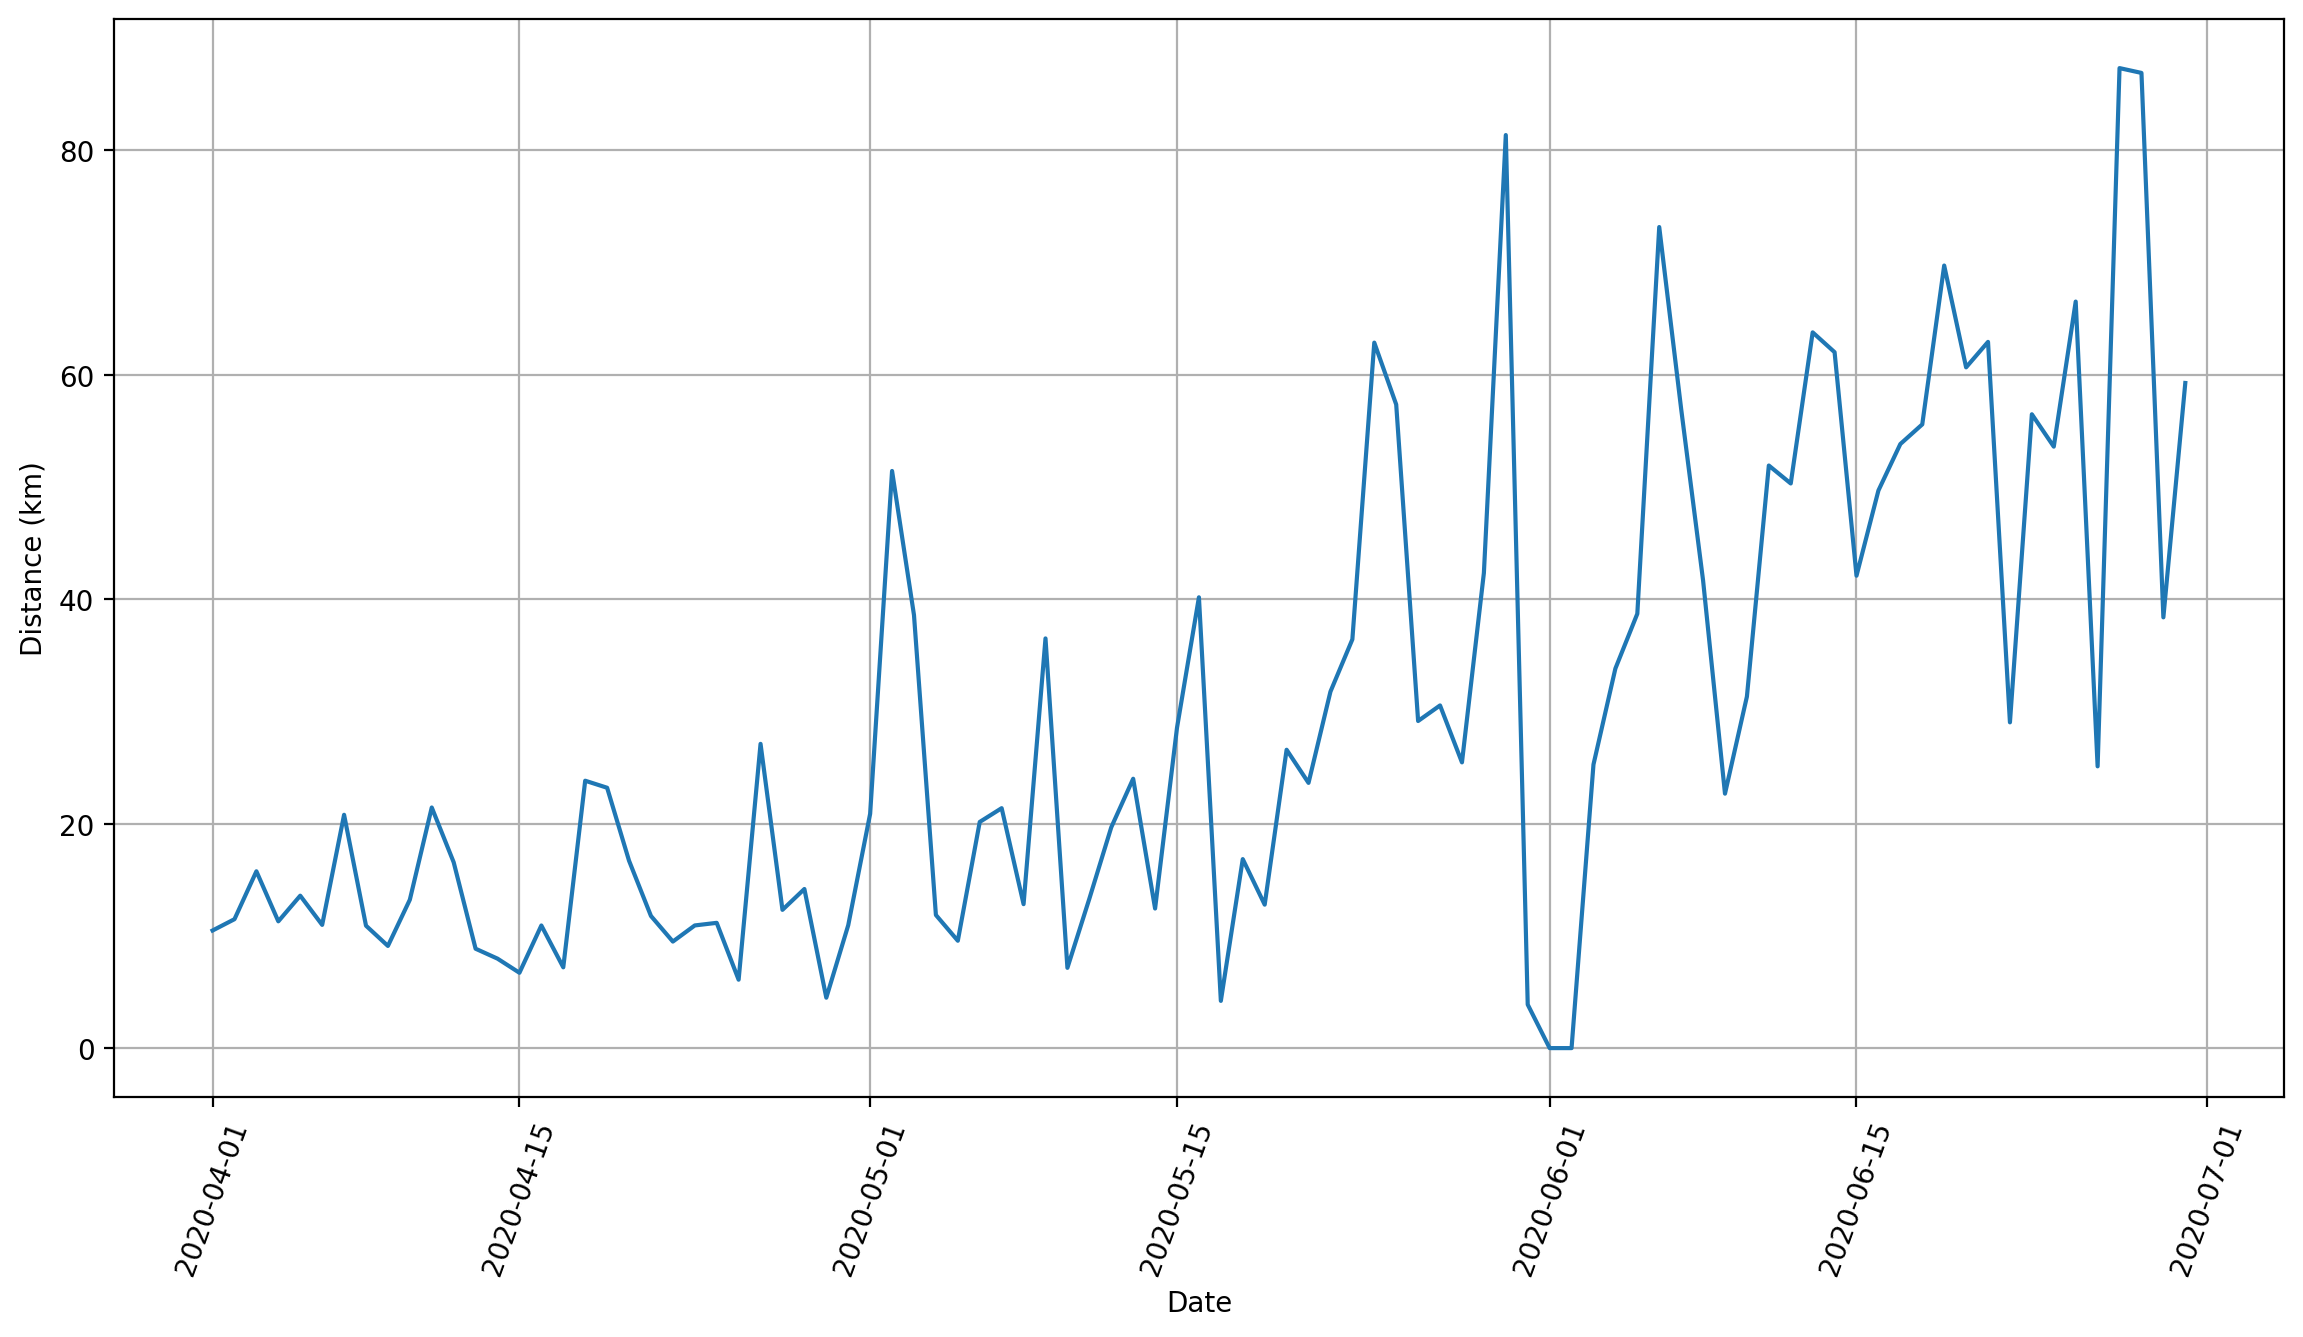

In [9]:
# 重みづけなし
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list = []
# current_timestampをdatetime型に変換する
df_lockdown1["started_at"] = pd.to_datetime(df_lockdown1["started_at"])
current_timestamp = df_lockdown1['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown1["started_at"].max())
end_timestamp = df_lockdown1["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown1[(df_lockdown1['started_at'] >= current_timestamp) & (df_lockdown1['started_at'] < next_timestamp)]

    # Add to new dataset
    # 距離をユニークな数のノード数で割る
    distance_list.append(subset["distance"].sum()/len(subset["start_station_name"].unique())) if len(subset["start_station_name"].unique()) != 0 else distance_list.append(0)

    # update timestamp
    current_timestamp = next_timestamp
  
# 日付のリストを作成する
date_list = []
current_timestamp = df_lockdown1['started_at'].min()
end_timestamp = df_lockdown1["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # Add to new dataset
    date_list.append(current_timestamp)
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval
    
    # update timestamp
    current_timestamp = next_timestamp

# 日付と平均距離のプロットを作成する
plt.figure(figsize=(14,7))
plt.plot(date_list, distance_list)
plt.xticks(rotation=70)
plt.xlabel("Date")
plt.ylabel("Distance (km)")
plt.grid()
plt.show()


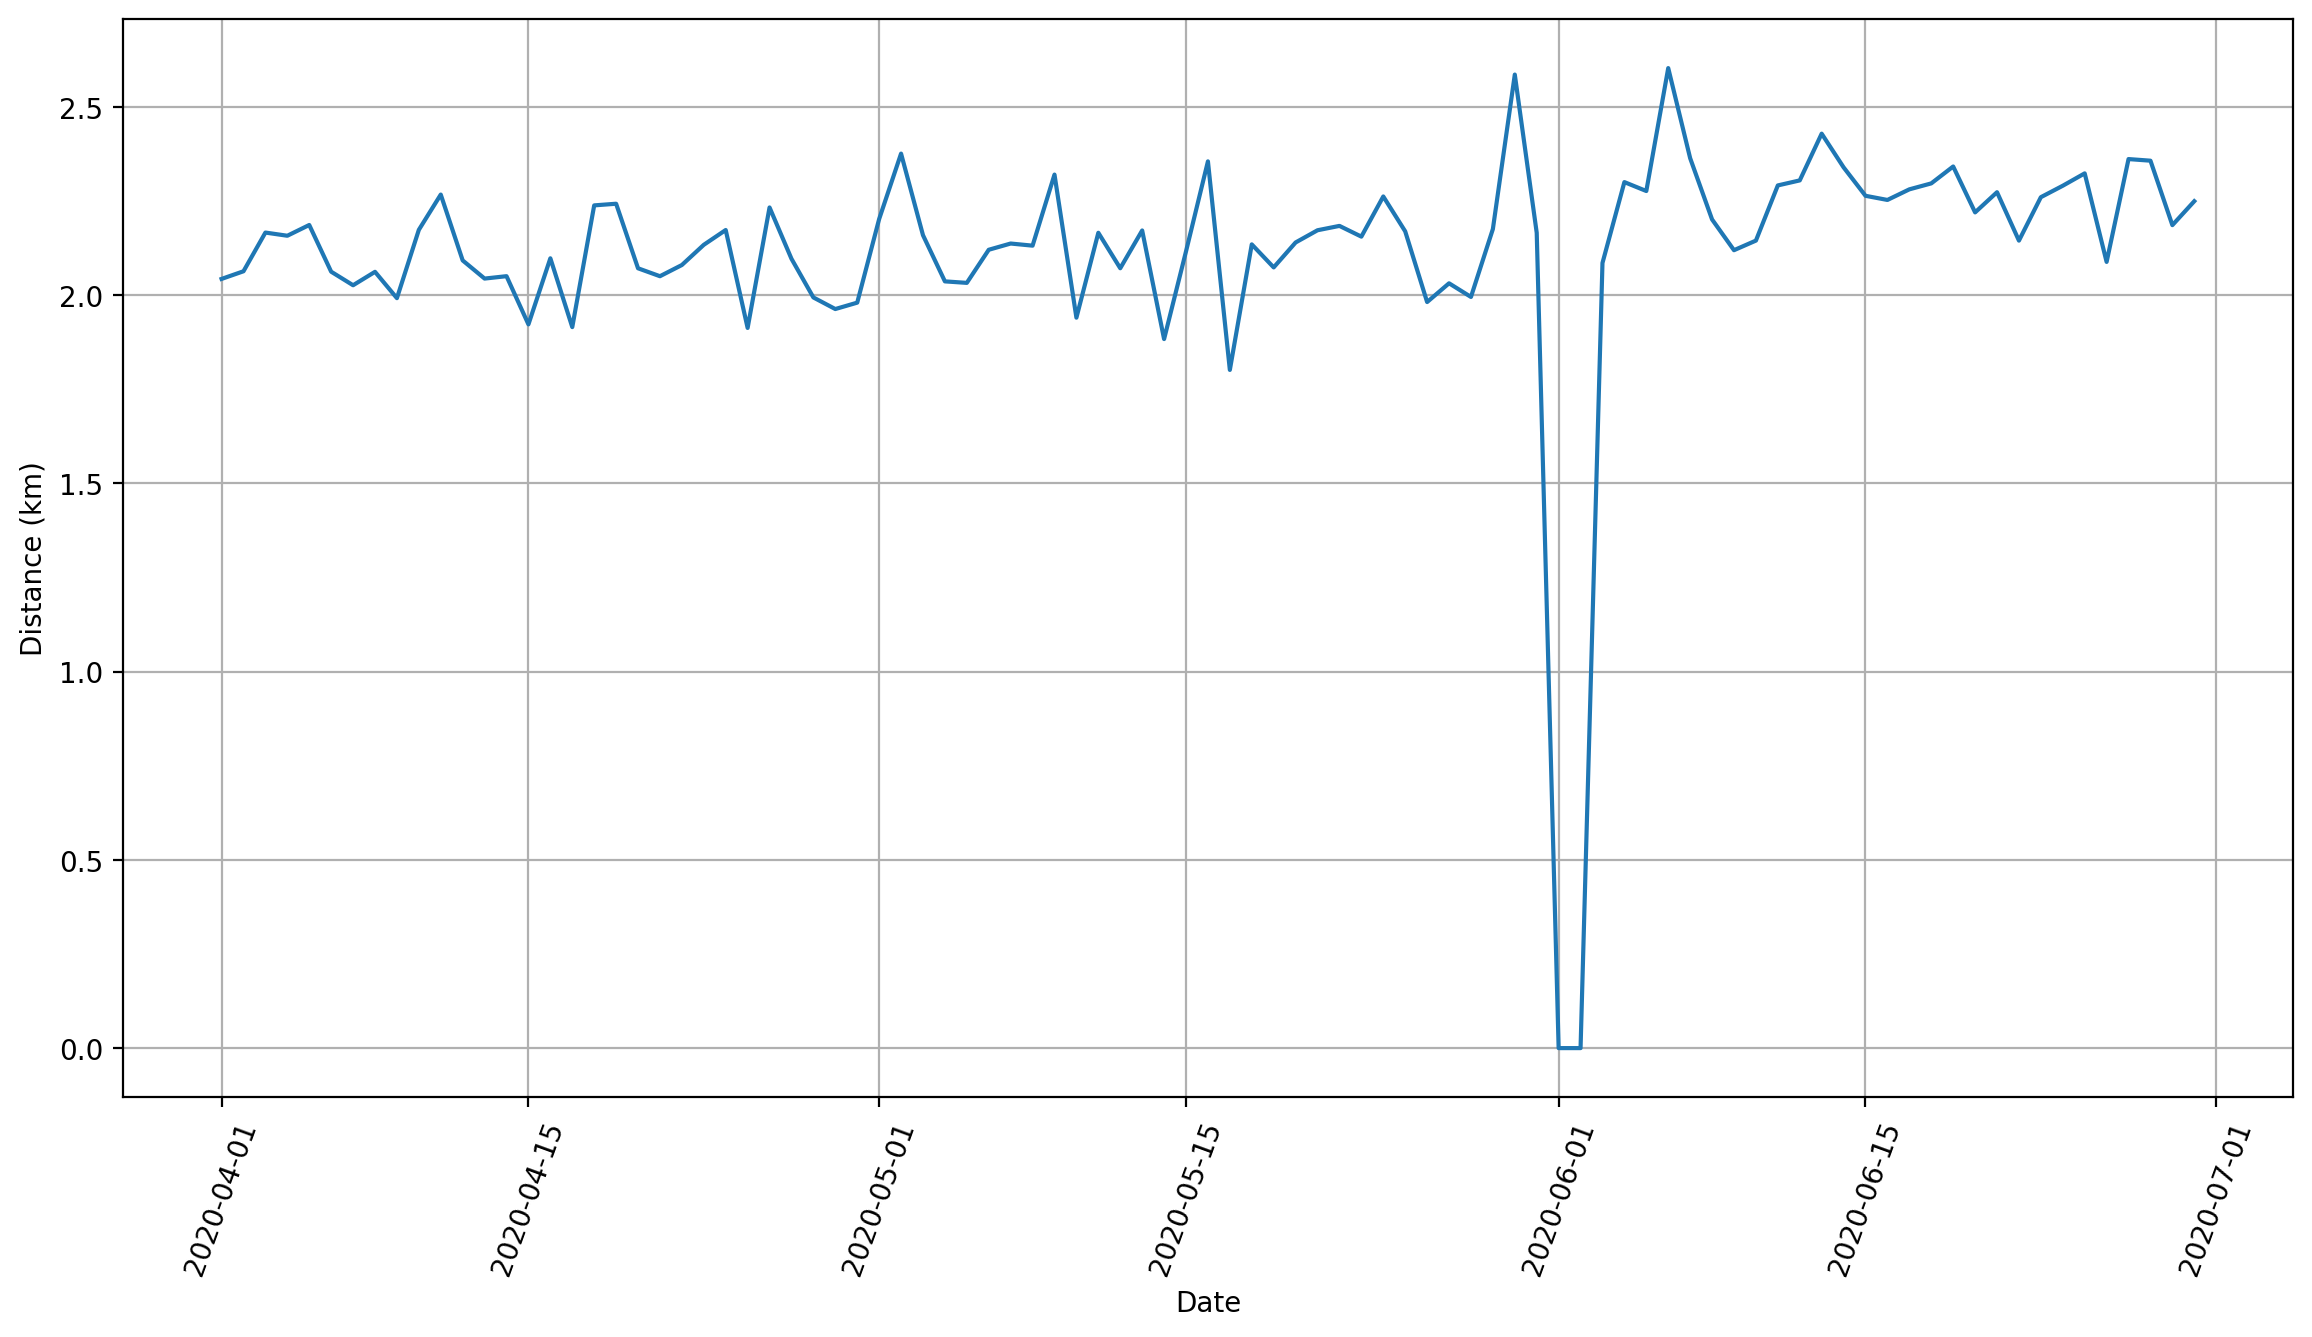

In [11]:
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list = []
# current_timestampをdatetime型に変換する
df_lockdown1["started_at"] = pd.to_datetime(df_lockdown1["started_at"])
current_timestamp = df_lockdown1['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown1["started_at"].max())
end_timestamp = df_lockdown1["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown1[(df_lockdown1['started_at'] >= current_timestamp) & (df_lockdown1['started_at'] < next_timestamp)]

    # Add to new dataset
    distance_list.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)

    # update timestamp
    current_timestamp = next_timestamp
  
# 日付のリストを作成する
date_list = []
current_timestamp = df_lockdown1['started_at'].min()
end_timestamp = df_lockdown1["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # Add to new dataset
    date_list.append(current_timestamp)
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval
    
    # update timestamp
    current_timestamp = next_timestamp

# 日付と平均距離のプロットを作成する
plt.figure(figsize=(14,7))
plt.plot(date_list, distance_list)
plt.xticks(rotation=70)
plt.xlabel("Date")
plt.ylabel("Distance (km)")
plt.grid()
plt.show()


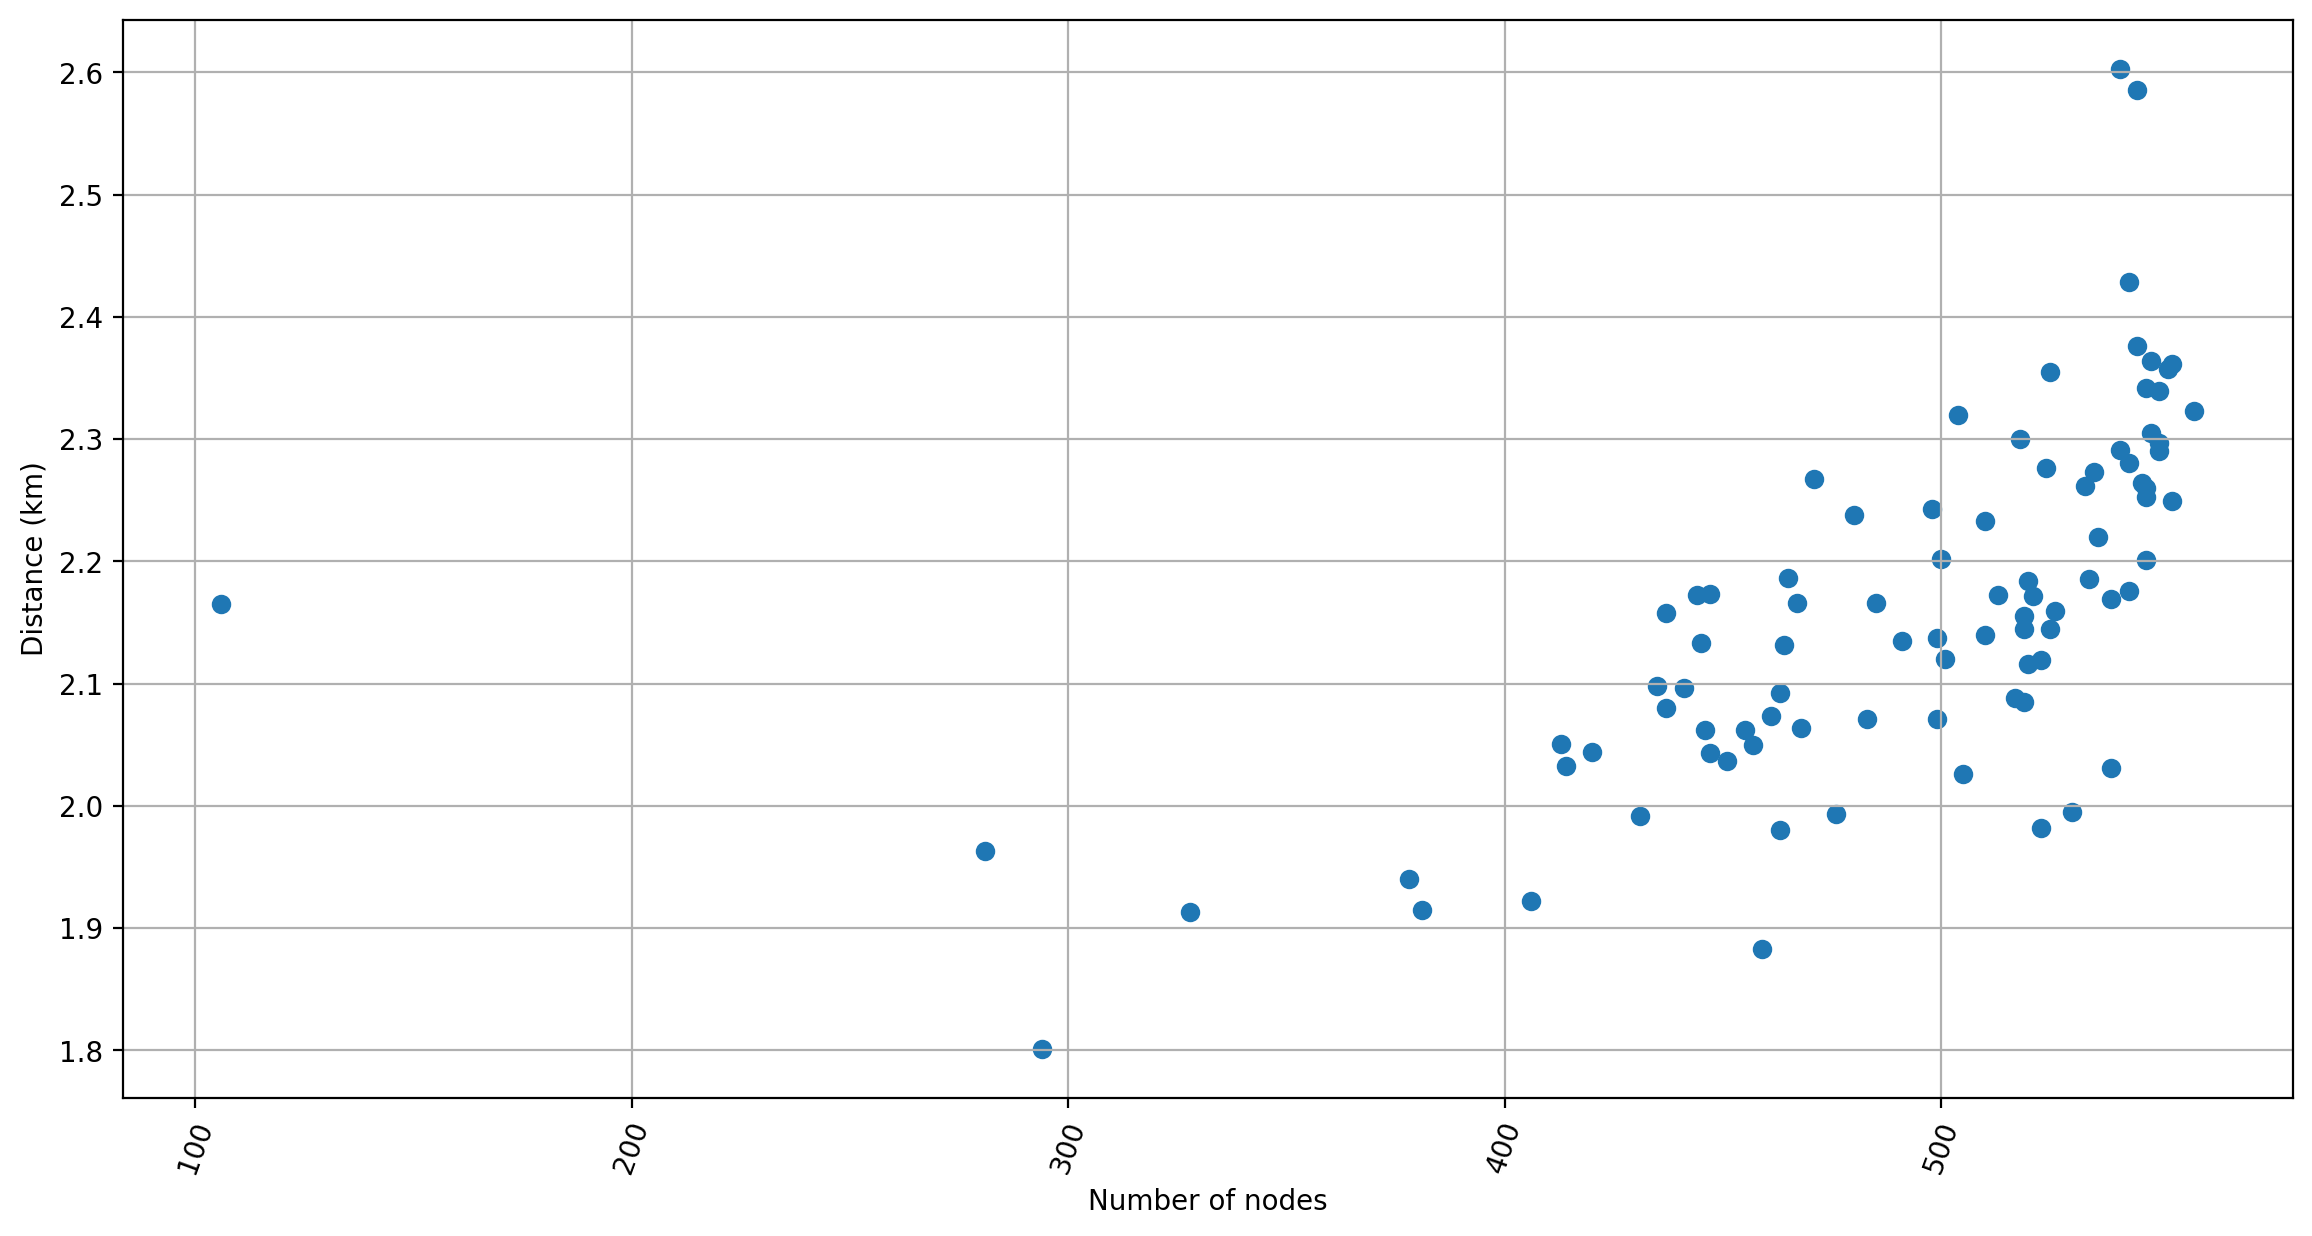

In [3]:
# 各日でx軸にノード数、y軸に平均距離を取ったプロットを作成する
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list = []
# current_timestampをdatetime型に変換する
df_lockdown1["started_at"] = pd.to_datetime(df_lockdown1["started_at"])
current_timestamp = df_lockdown1['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown1["started_at"].max())
end_timestamp = df_lockdown1["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown1[(df_lockdown1['started_at'] >= current_timestamp) & (df_lockdown1['started_at'] < next_timestamp)]

    # Add to new dataset
    distance_list.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)
    # Delete anything with 0 in it
    if distance_list[-1] == 0:
        distance_list.pop()

    # update timestamp
    current_timestamp = next_timestamp

# started_atを基に、一日ごとのノード数を計算してリストに入れる
node_list = []
# current_timestampをdatetime型に変換する
df_lockdown1["started_at"] = pd.to_datetime(df_lockdown1["started_at"])
current_timestamp = df_lockdown1['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown1["started_at"].max())
end_timestamp = df_lockdown1["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown1[(df_lockdown1['started_at'] >= current_timestamp) & (df_lockdown1['started_at'] < next_timestamp)]

    # Add to new dataset
    node_list.append(len(subset["start_station_name"].unique()))
    # Delete anything with 0 in it
    if node_list[-1] == 0:
        node_list.pop()

    # update timestamp
    current_timestamp = next_timestamp

# 45度の直線をプロットする
# x = np.arange(0.1, 3, 0.1)
# y = x
plt.figure(figsize=(14,7))
# plt.plot(x, y, color='red')
plt.scatter(node_list, distance_list, label="lockdown 1")
plt.xticks(rotation=70)
plt.xlabel("Number of nodes")
plt.ylabel("Distance (km)")
plt.grid()
plt.show()

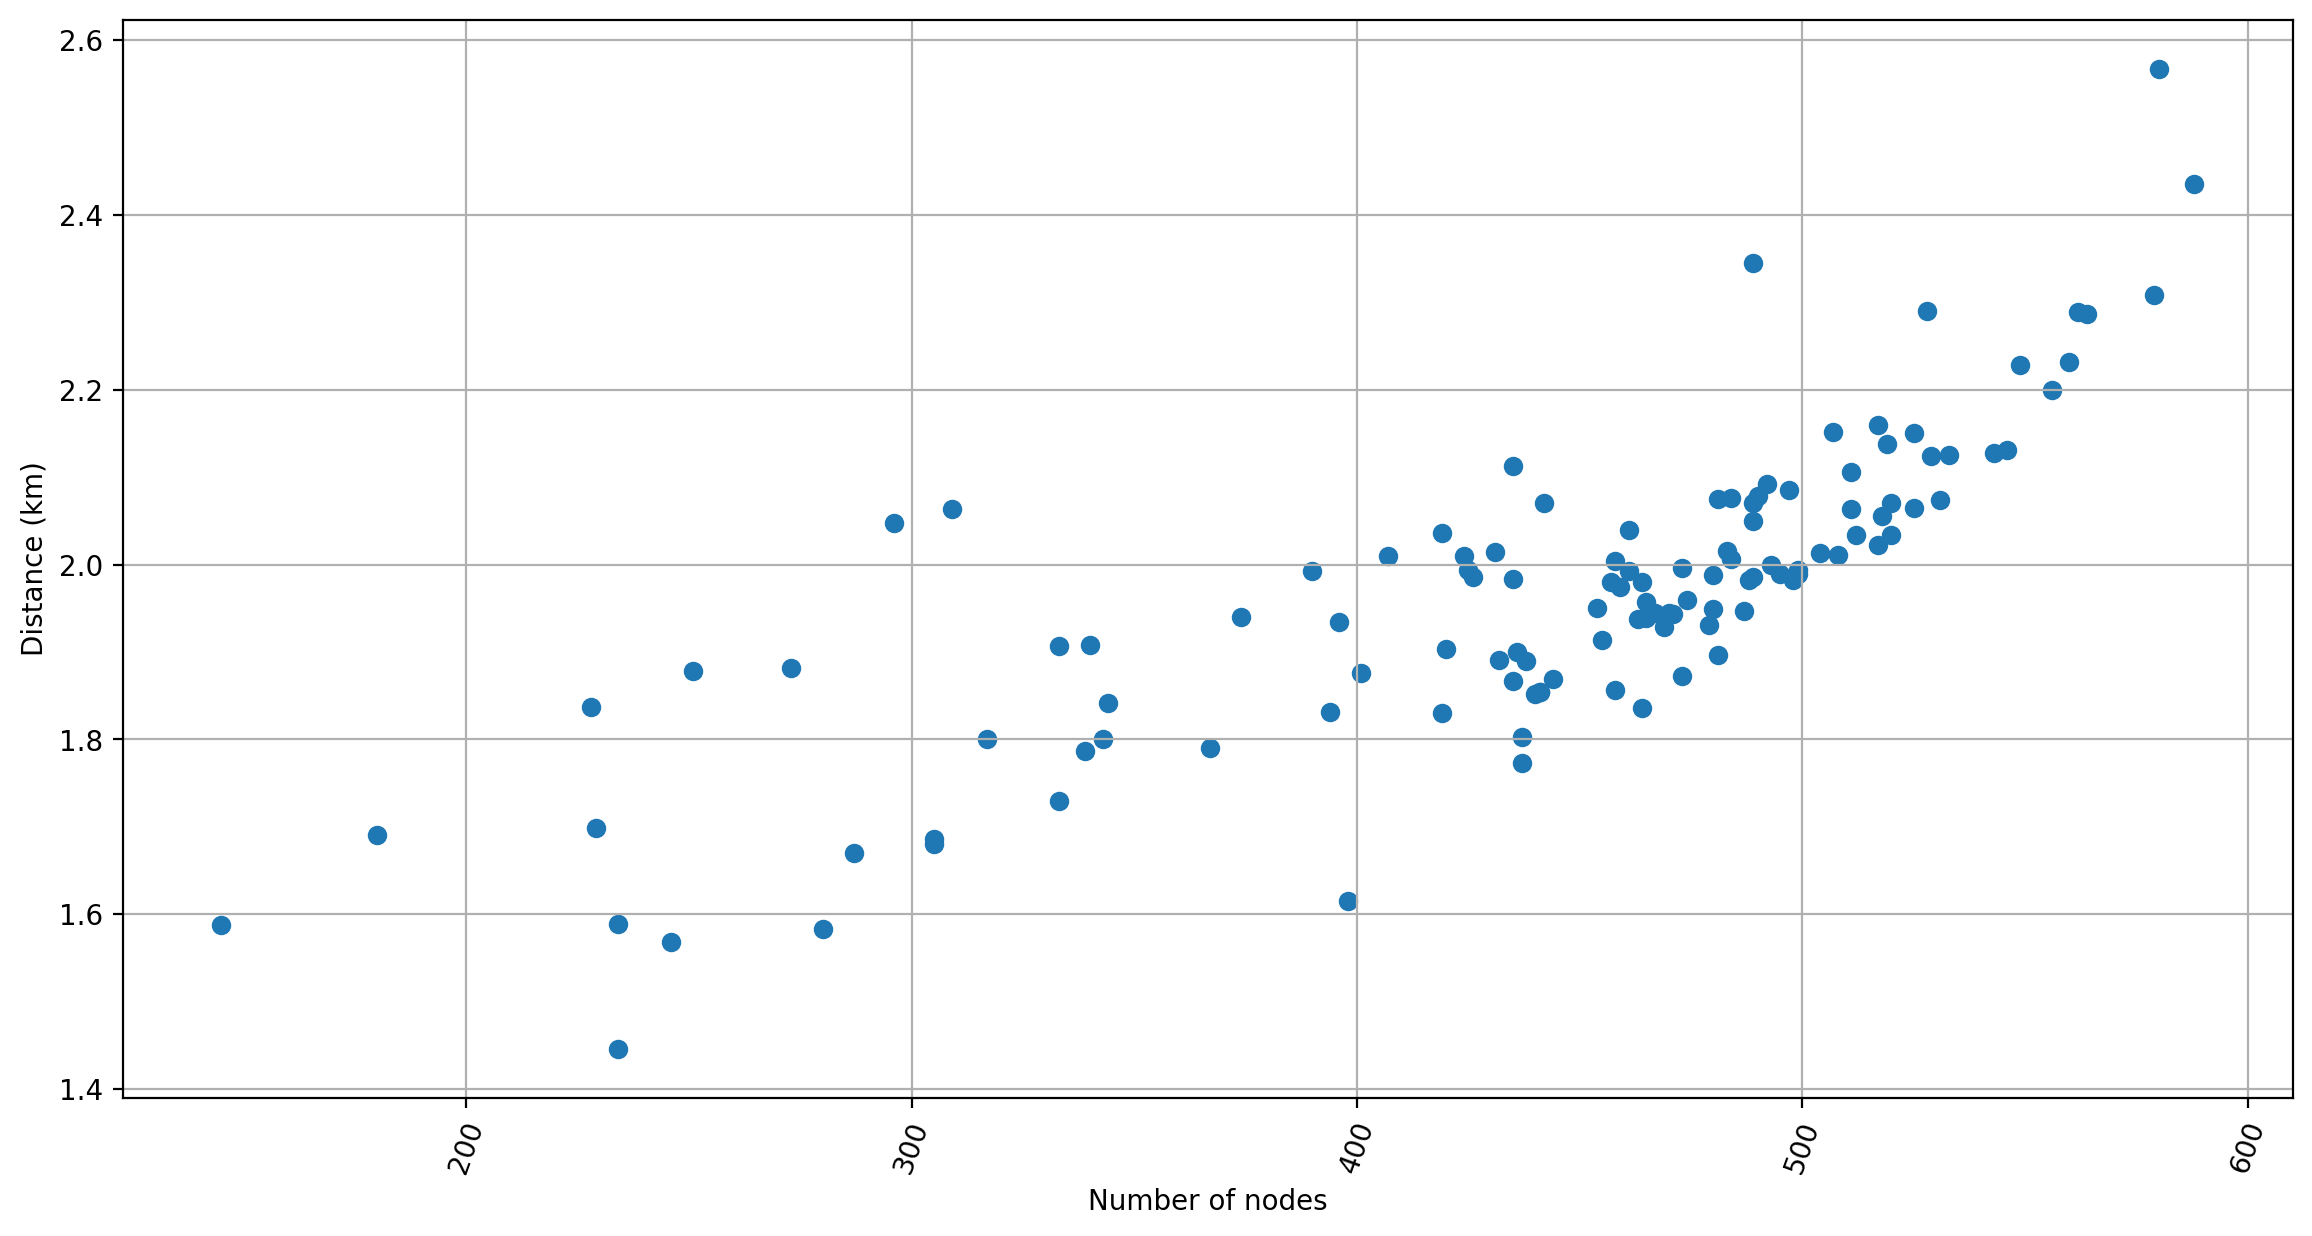

In [9]:
# df_lockdown2
# 各日でx軸にノード数、y軸に平均距離を取ったプロットを作成する
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list = []
# current_timestampをdatetime型に変換する
df_lockdown2["started_at"] = pd.to_datetime(df_lockdown2["started_at"])
current_timestamp = df_lockdown2['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown2["started_at"].max())
end_timestamp = df_lockdown2["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown2[(df_lockdown2['started_at'] >= current_timestamp) & (df_lockdown2['started_at'] < next_timestamp)]

    # Add to new dataset
    distance_list.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)

    # update timestamp
    current_timestamp = next_timestamp

# started_atを基に、一日ごとのノード数を計算してリストに入れる
node_list = []
# current_timestampをdatetime型に変換する
df_lockdown2["started_at"] = pd.to_datetime(df_lockdown2["started_at"])
current_timestamp = df_lockdown2['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown2["started_at"].max())
end_timestamp = df_lockdown2["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown2[(df_lockdown2['started_at'] >= current_timestamp) & (df_lockdown2['started_at'] < next_timestamp)]

    # Add to new dataset
    node_list.append(len(subset["start_station_name"].unique()))

    # update timestamp
    current_timestamp = next_timestamp

# 45度の直線をプロットする
# x = np.arange(0.1, 3, 0.1)
# y = x
plt.figure(figsize=(14,7))
# plt.plot(x, y, color='red')
plt.scatter(node_list, distance_list)
plt.xticks(rotation=70)
plt.xlabel("Number of nodes")
plt.ylabel("Distance (km)")
plt.grid()
plt.show()

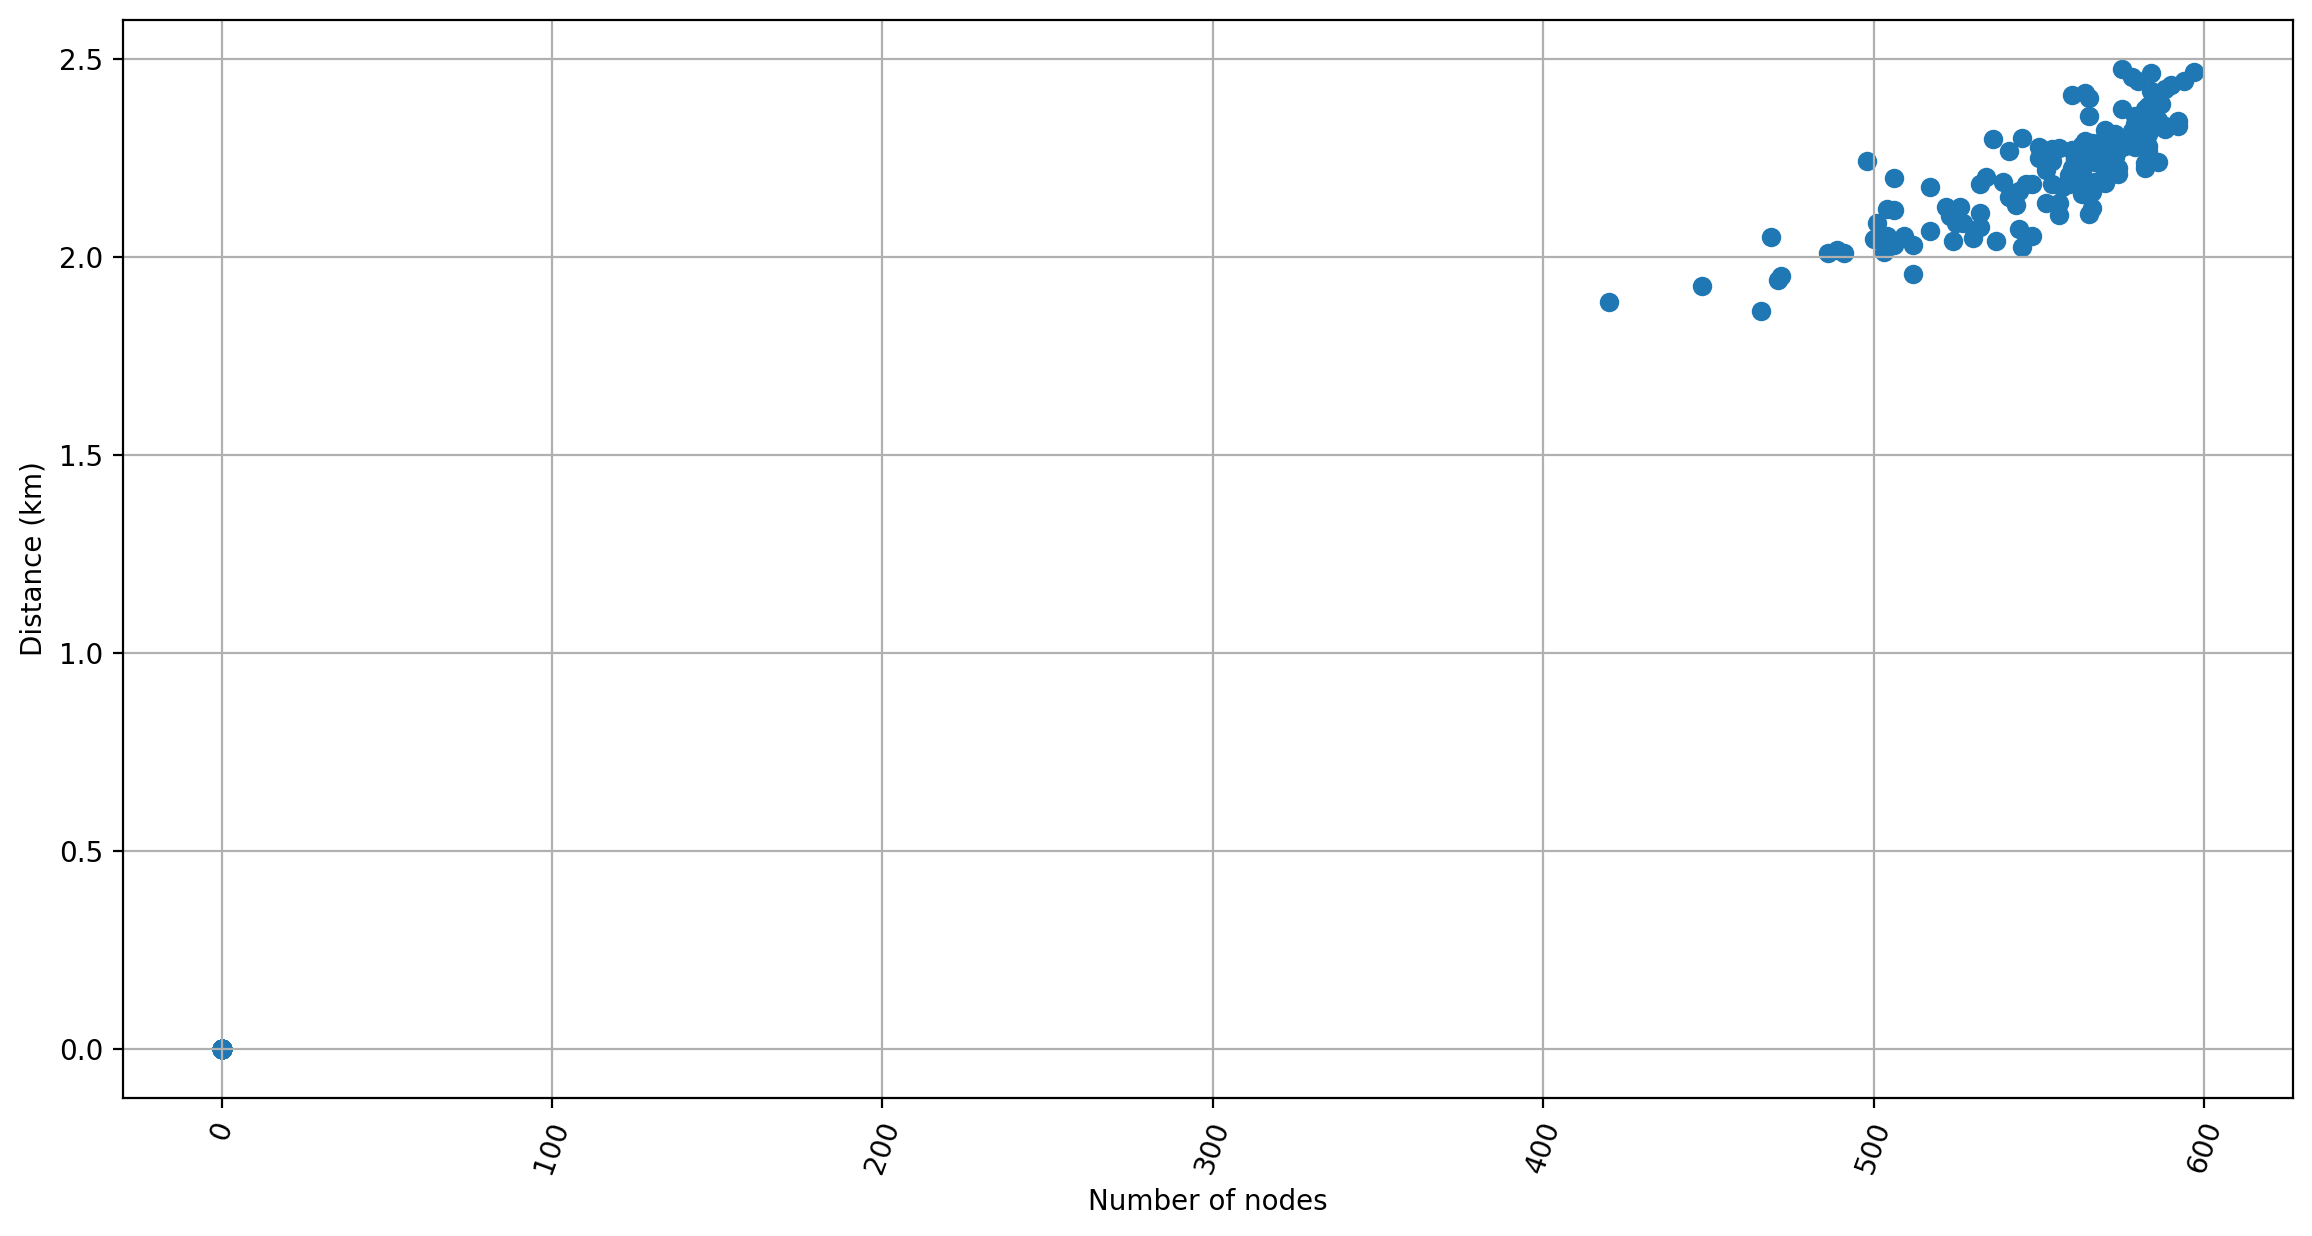

In [11]:
# df_lockdown2
# 各日でx軸にノード数、y軸に平均距離を取ったプロットを作成する
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list = []
# current_timestampをdatetime型に変換する
df_normal["started_at"] = pd.to_datetime(df_normal["started_at"])
current_timestamp = df_normal['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_normal["started_at"].max())
end_timestamp = df_normal["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_normal[(df_normal['started_at'] >= current_timestamp) & (df_normal['started_at'] < next_timestamp)]

    # Add to new dataset
    distance_list.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)

    # update timestamp
    current_timestamp = next_timestamp

# started_atを基に、一日ごとのノード数を計算してリストに入れる
node_list = []
# current_timestampをdatetime型に変換する
df_normal["started_at"] = pd.to_datetime(df_normal["started_at"])
current_timestamp = df_normal['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_normal["started_at"].max())
end_timestamp = df_normal["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_normal[(df_normal['started_at'] >= current_timestamp) & (df_normal['started_at'] < next_timestamp)]

    # Add to new dataset
    node_list.append(len(subset["start_station_name"].unique()))

    # update timestamp
    current_timestamp = next_timestamp

# 45度の直線をプロットする
# x = np.arange(0.1, 3, 0.1)
# y = x
plt.figure(figsize=(14,7))
# plt.plot(x, y, color='red')
plt.scatter(node_list, distance_list)
plt.xticks(rotation=70)
plt.xlabel("Number of nodes")
plt.ylabel("Distance (km)")
plt.grid()
plt.show()

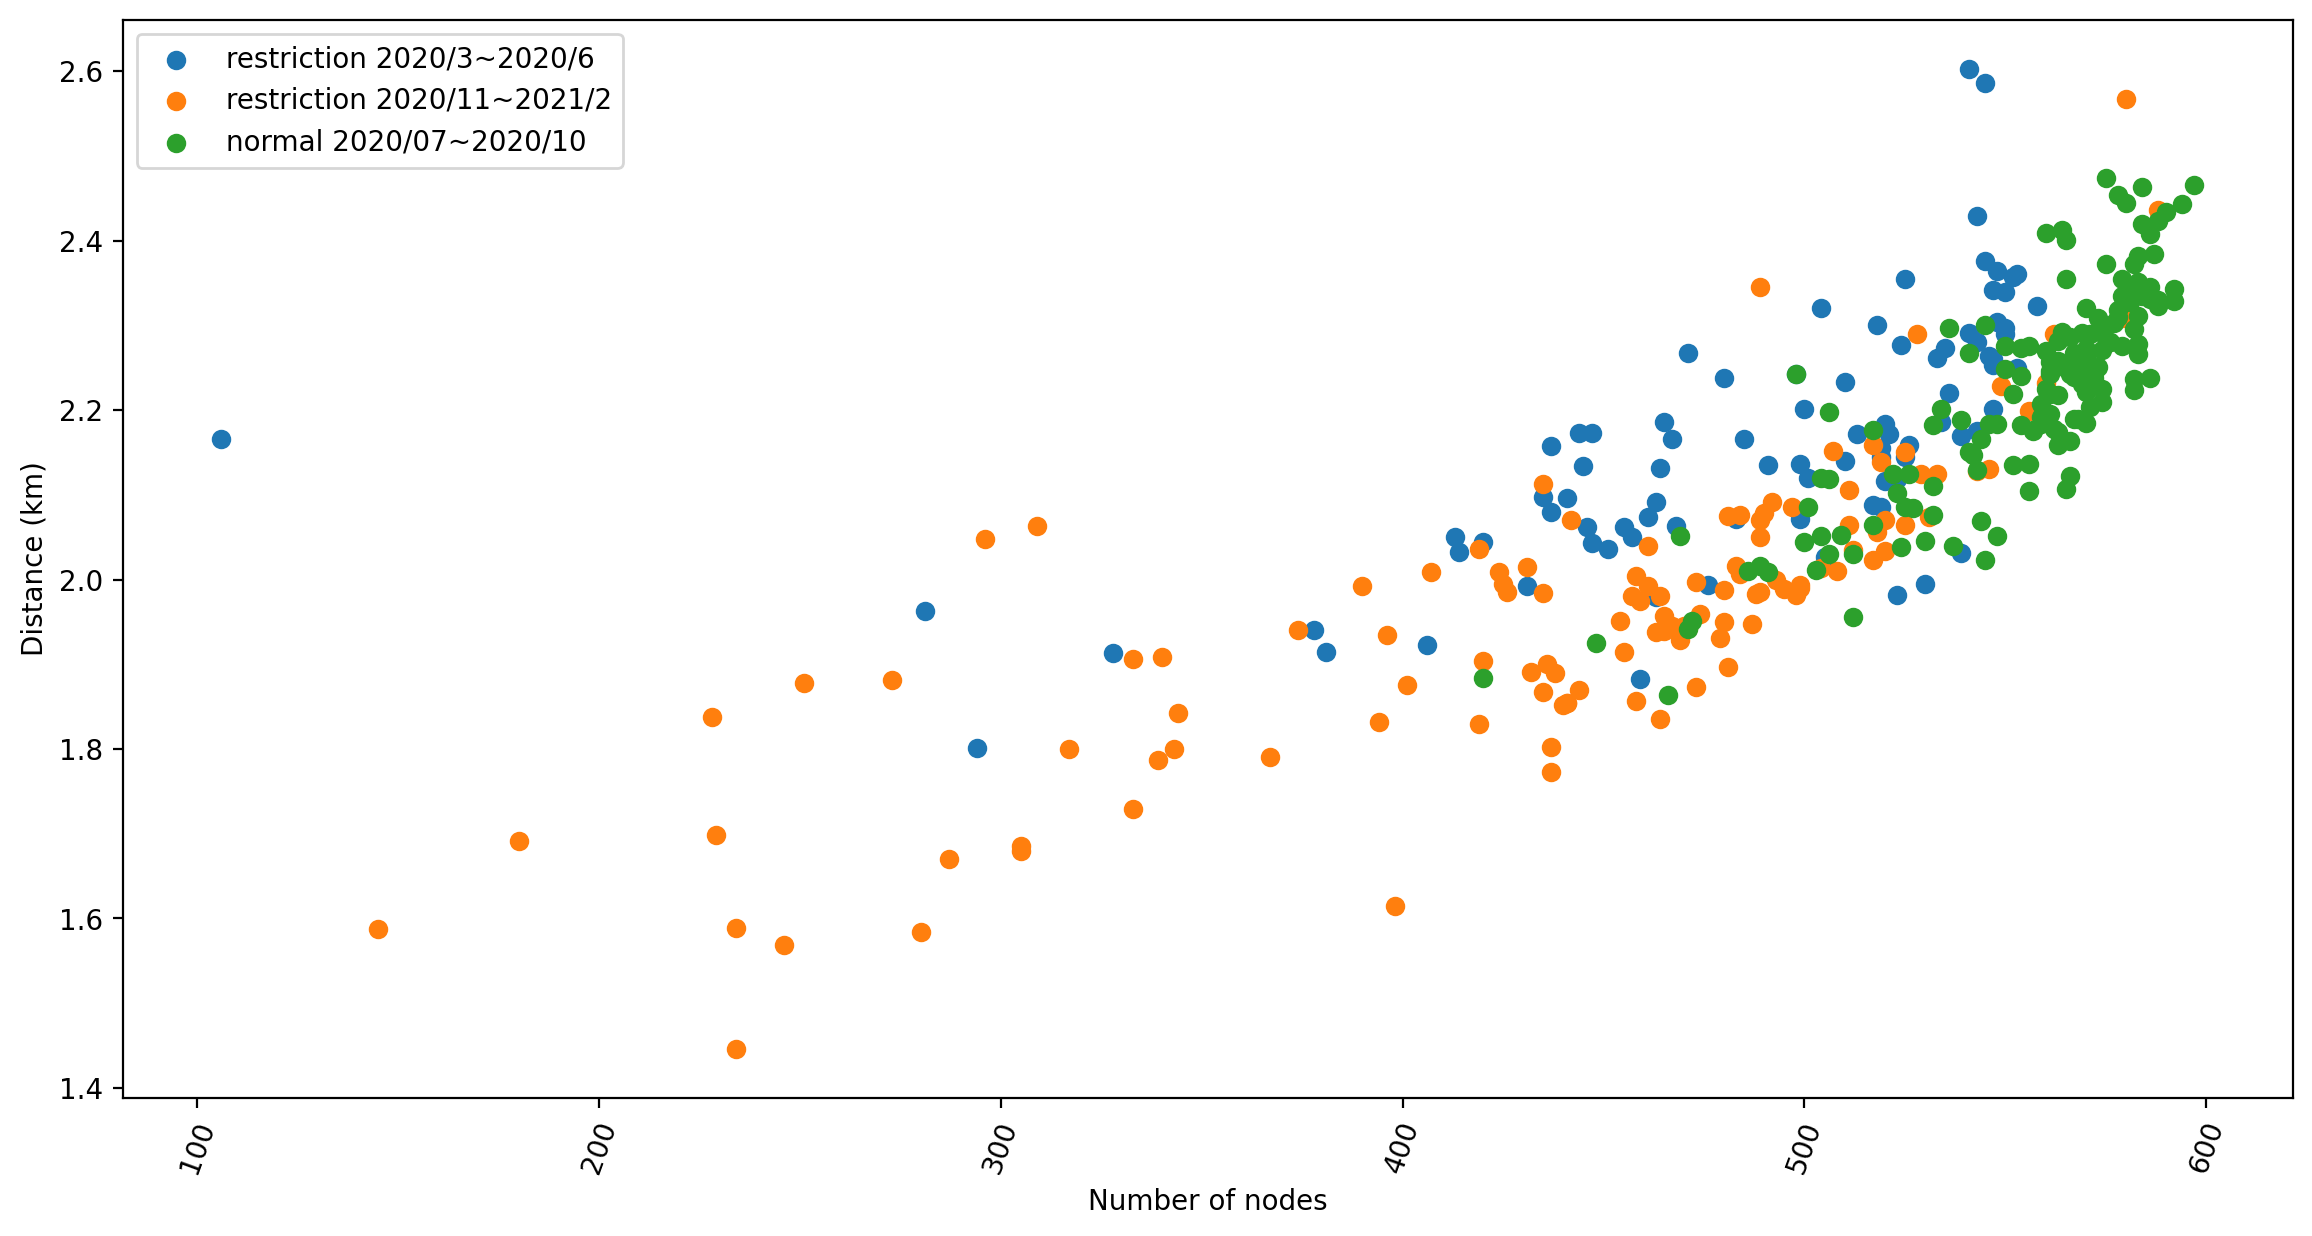

In [5]:
# Mix
# 各日でx軸にノード数、y軸に平均距離を取ったプロットを作成する
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list = []
# current_timestampをdatetime型に変換する
df_lockdown1["started_at"] = pd.to_datetime(df_lockdown1["started_at"])
current_timestamp = df_lockdown1['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown1["started_at"].max())
end_timestamp = df_lockdown1["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown1[(df_lockdown1['started_at'] >= current_timestamp) & (df_lockdown1['started_at'] < next_timestamp)]

    # Add to new dataset
    distance_list.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)
    # Delete anything with 0 in it
    if distance_list[-1] == 0:
        distance_list.pop()

    # update timestamp
    current_timestamp = next_timestamp

# started_atを基に、一日ごとのノード数を計算してリストに入れる
node_list = []
# current_timestampをdatetime型に変換する
df_lockdown1["started_at"] = pd.to_datetime(df_lockdown1["started_at"])
current_timestamp = df_lockdown1['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown1["started_at"].max())
end_timestamp = df_lockdown1["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown1[(df_lockdown1['started_at'] >= current_timestamp) & (df_lockdown1['started_at'] < next_timestamp)]

    # Add to new dataset
    node_list.append(len(subset["start_station_name"].unique()))
    if node_list[-1] == 0:
        node_list.pop()

    # update timestamp
    current_timestamp = next_timestamp


# df_lockdown2
# 各日でx軸にノード数、y軸に平均距離を取ったプロットを作成する
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list2 = []
# current_timestampをdatetime型に変換する
df_lockdown2["started_at"] = pd.to_datetime(df_lockdown2["started_at"])
current_timestamp = df_lockdown2['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown2["started_at"].max())
end_timestamp = df_lockdown2["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown2[(df_lockdown2['started_at'] >= current_timestamp) & (df_lockdown2['started_at'] < next_timestamp)]

    # Add to new dataset
    distance_list2.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)
    # distance_list2 = [x for x in distance_list2 if x != 0]

    # update timestamp
    current_timestamp = next_timestamp

# started_atを基に、一日ごとのノード数を計算してリストに入れる
node_list2 = []
# current_timestampをdatetime型に変換する
df_lockdown2["started_at"] = pd.to_datetime(df_lockdown2["started_at"])
current_timestamp = df_lockdown2['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown2["started_at"].max())
end_timestamp = df_lockdown2["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown2[(df_lockdown2['started_at'] >= current_timestamp) & (df_lockdown2['started_at'] < next_timestamp)]

    # Add to new dataset
    node_list2.append(len(subset["start_station_name"].unique()))
    if node_list2[-1] == 0:
        node_list2.pop()

    # update timestamp
    current_timestamp = next_timestamp


# df_lockdown2
# 各日でx軸にノード数、y軸に平均距離を取ったプロットを作成する
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list3 = []
# current_timestampをdatetime型に変換する
df_normal["started_at"] = pd.to_datetime(df_normal["started_at"])
current_timestamp = df_normal['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_normal["started_at"].max())
end_timestamp = df_normal["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_normal[(df_normal['started_at'] >= current_timestamp) & (df_normal['started_at'] < next_timestamp)]

    # Add to new dataset
    distance_list3.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)
    if distance_list3[-1] == 0:
        distance_list3.pop()

    # update timestamp
    current_timestamp = next_timestamp

# started_atを基に、一日ごとのノード数を計算してリストに入れる
node_list3 = []
# current_timestampをdatetime型に変換する
df_normal["started_at"] = pd.to_datetime(df_normal["started_at"])
current_timestamp = df_normal['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_normal["started_at"].max())
end_timestamp = df_normal["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_normal[(df_normal['started_at'] >= current_timestamp) & (df_normal['started_at'] < next_timestamp)]

    # Add to new dataset
    node_list3.append(len(subset["start_station_name"].unique()))
    if node_list3[-1] == 0:
        node_list3.pop()

    # update timestamp
    current_timestamp = next_timestamp


plt.figure(figsize=(14,7))
plt.scatter(node_list, distance_list, label="restriction 2020/3~2020/6")
plt.scatter(node_list2, distance_list2, label="restriction 2020/11~2021/2")
plt.scatter(node_list3, distance_list3, label="normal 2020/07~2020/10")
plt.xticks(rotation=70)
plt.xlabel("Number of nodes")
plt.ylabel("Distance (km)")
plt.legend()
plt.show()

In [6]:
# リファクタリングする
def return_nd(df):
  distance_list = []
  # current_timestampをdatetime型に変換する
  df["started_at"] = pd.to_datetime(df["started_at"])
  current_timestamp = df['started_at'].min()
  # end_timestampをdatetime型に変換する
  end_timestamp = pd.to_datetime(df["started_at"].max())
  end_timestamp = df["started_at"].max()
  interval = timedelta(days=1)

  while current_timestamp <= end_timestamp:
      # current timestamp plus interval
      next_timestamp = current_timestamp + interval

      # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
      subset = df[(df['started_at'] >= current_timestamp) & (df['started_at'] < next_timestamp)]

      # Add to new dataset
      distance_list.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)
      # Delete anything with 0 in it
      if distance_list[-1] == 0:
          distance_list.pop()

      # update timestamp
      current_timestamp = next_timestamp

  # started_atを基に、一日ごとのノード数を計算してリストに入れる
  node_list = []
  # current_timestampをdatetime型に変換する
  df["started_at"] = pd.to_datetime(df["started_at"])
  current_timestamp = df['started_at'].min()
  # end_timestampをdatetime型に変換する
  end_timestamp = pd.to_datetime(df["started_at"].max())
  end_timestamp = df["started_at"].max()
  interval = timedelta(days=1)

  while current_timestamp <= end_timestamp:
      # current timestamp plus interval
      next_timestamp = current_timestamp + interval

      # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
      subset = df[(df['started_at'] >= current_timestamp) & (df['started_at'] < next_timestamp)]

      # Add to new dataset
      node_list.append(len(subset["start_station_name"].unique()))
      if node_list[-1] == 0:
          node_list.pop()

      # update timestamp
      current_timestamp = next_timestamp

  return node_list, distance_list

In [22]:
lockdown_nd = return_nd(df_lockdown1)
lockdown_nd2 = return_nd(df_lockdown2)
normal_nd = return_nd(df_normal)
print(lockdown_nd[1])

[2.0429417725731067, 2.0632854286088675, 2.1660747849001165, 2.1576372559658035, 2.186207067313815, 2.06214388375143, 2.026150298167821, 2.0617983771513853, 1.9918699729971232, 2.1732852444560966, 2.2669976009153885, 2.092100371963361, 2.0438764018910396, 2.0502492587736705, 1.9222351416592536, 2.0977286876090395, 1.9149494710513923, 2.2382751332418707, 2.242655029758495, 2.0711946200157896, 2.0501457859002663, 2.079890015283318, 2.1335554497667704, 2.1728772715271325, 1.9128055220313807, 2.2328040857080507, 2.0965273524006602, 1.993729522942942, 1.962971777229163, 1.9799511183237315, 2.2018979431224306, 2.375825731806014, 2.1591499506575462, 2.036433564508554, 2.032464996769109, 2.1203784075765575, 2.136964591849973, 2.131324028543082, 2.3201188835714692, 1.9400767691907348, 2.165536490801677, 2.0713180101519546, 2.171652973435308, 1.8831792087406642, 2.1160374901140067, 2.3551656436847517, 1.8012552902848642, 2.13470681684117, 2.073546709828677, 2.139772433918642, 2.1722238899094224,

/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_3375/1401803750.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(lockdown_nd[0], lockdown_nd[1], label="restriction 2020/3~2020/6", cmap="viridis", marker="o", s=15)
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_3375/1401803750.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(lockdown_nd2[0], lockdown_nd2[1], label="restriction 2020/11~2021/2", cmap="viridis", marker="s", s=15)
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_3375/1401803750.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(normal_nd[0], normal_nd[1], label="normal 2020/07~2020/10", cmap="viridis", marker="D", s=15)


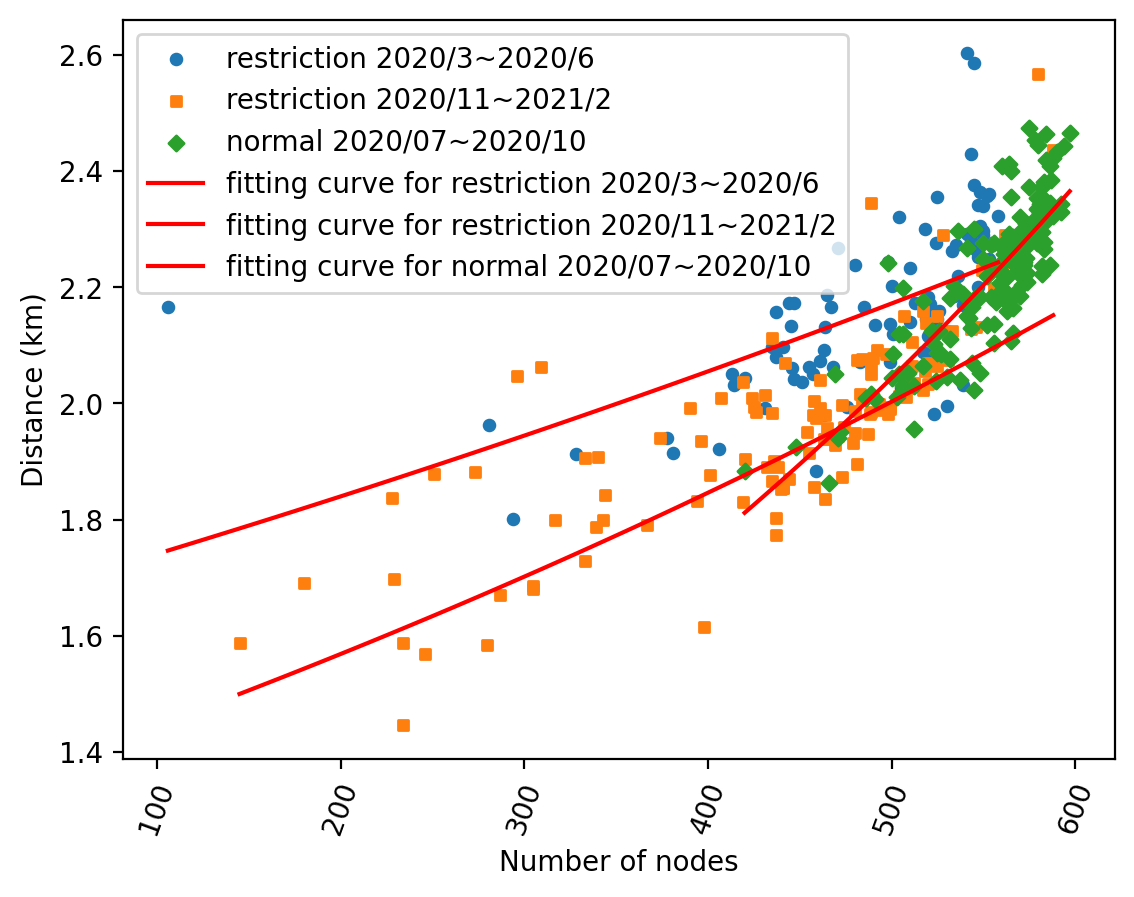

In [30]:
# lockdown_ndを近似曲線にフィットさせる
plt.scatter(lockdown_nd[0], lockdown_nd[1], label="restriction 2020/3~2020/6", cmap="viridis", marker="o", s=15)
plt.scatter(lockdown_nd2[0], lockdown_nd2[1], label="restriction 2020/11~2021/2", cmap="viridis", marker="s", s=15)
plt.scatter(normal_nd[0], normal_nd[1], label="normal 2020/07~2020/10", cmap="viridis", marker="D", s=15)

# Fit an exponential curve
coef = np.polyfit(lockdown_nd[0], np.log(lockdown_nd[1]), 1)
n_fit = np.linspace(min(lockdown_nd[0]), max(lockdown_nd[0]), 100)
d_ft = np.exp(coef[1]) * np.exp(coef[0]*n_fit)

coef2 = np.polyfit(lockdown_nd2[0], np.log(lockdown_nd2[1]), 1)
n_fit2 = np.linspace(min(lockdown_nd2[0]), max(lockdown_nd2[0]), 100)
d_ft2 = np.exp(coef2[1]) * np.exp(coef2[0]*n_fit)

coef3 = np.polyfit(normal_nd[0], np.log(normal_nd[1]), 1)
n_fit3= np.linspace(min(normal_nd[0]), max(normal_nd[0]), 100)
d_ft3 = np.exp(coef3[1]) * np.exp(coef3[0]*n_fit3)



plt.plot(n_fit, d_ft, 'r-', label="fitting curve for restriction 2020/3~2020/6")
plt.plot(n_fit2, d_ft2, 'r-', label="fitting curve for restriction 2020/11~2021/2")
plt.plot(n_fit3, d_ft3, 'r-', label="fitting curve for normal 2020/07~2020/10")

plt.xticks(rotation=70)
plt.xlabel("Number of nodes")
plt.ylabel("Distance (km)")
plt.legend()

plt.show()

In [ ]:
def exponential_func(x, a, b):
    return a * b ** x